#  TWITTER SENTIMENT ANALYSIS

##**Import modules**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

## **Loading the dataset**

In [96]:
df=pd.read_csv("https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/refs/heads/master/Twitter%20Sentiment%20Analysis%20-%20NLP/Twitter%20Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## **Preprocessing the datase**t

In [98]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

### Remove twitter handles (@user)

In [99]:
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### Remove special characters,numbers and punctuations

In [100]:
df['clean_tweet'] = df['clean_tweet'].str.replace('[^a-zA-Z#]', ' ', regex=True)
display(df.head())

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


### Remove short words

In [101]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


### Individual words considered as tokens

In [102]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


### Stem the words

In [103]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

,clean_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, caus, they, offer, whee..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time]"
4,"[factsguid, societi, #motiv]"


### Combine words into single sentence

In [104]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## **Exploratory Data Analysis**

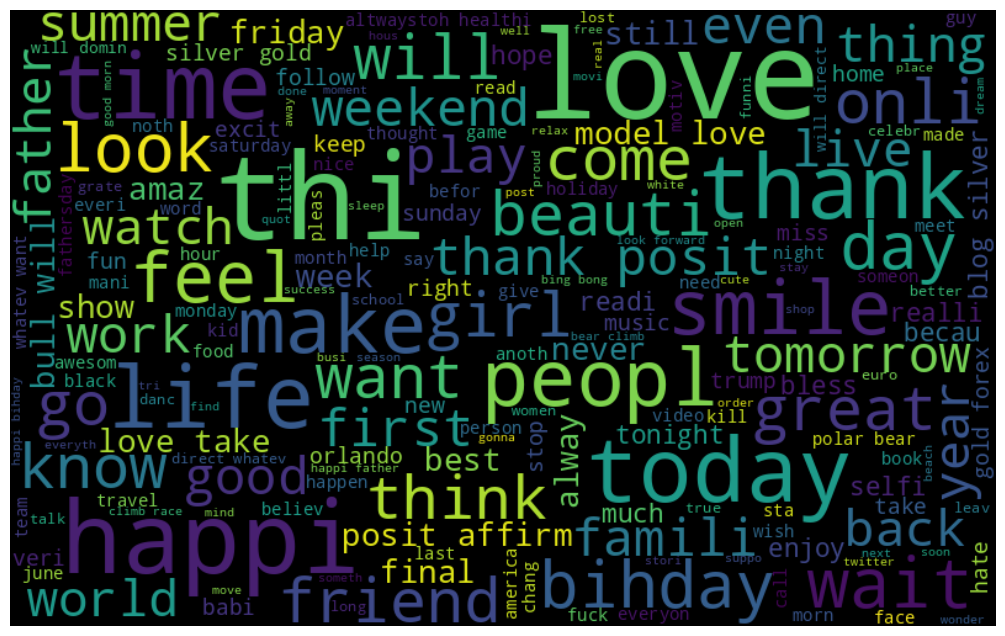

In [105]:
!pip install wordcloud
all_words= " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Frgquent words visualization for +ve

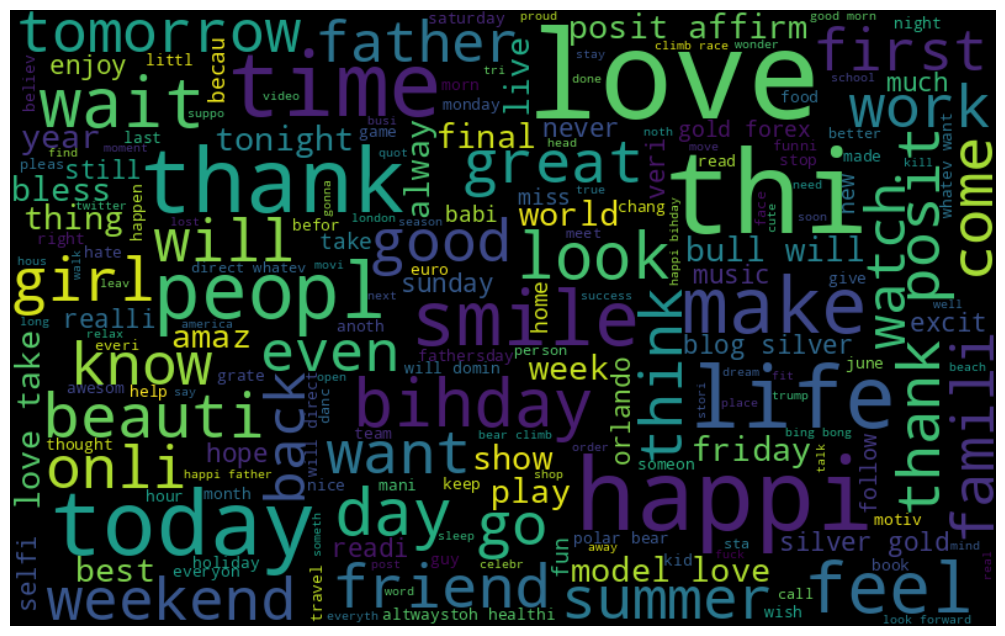

In [106]:
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


###  Frgquent words visualization for -ve

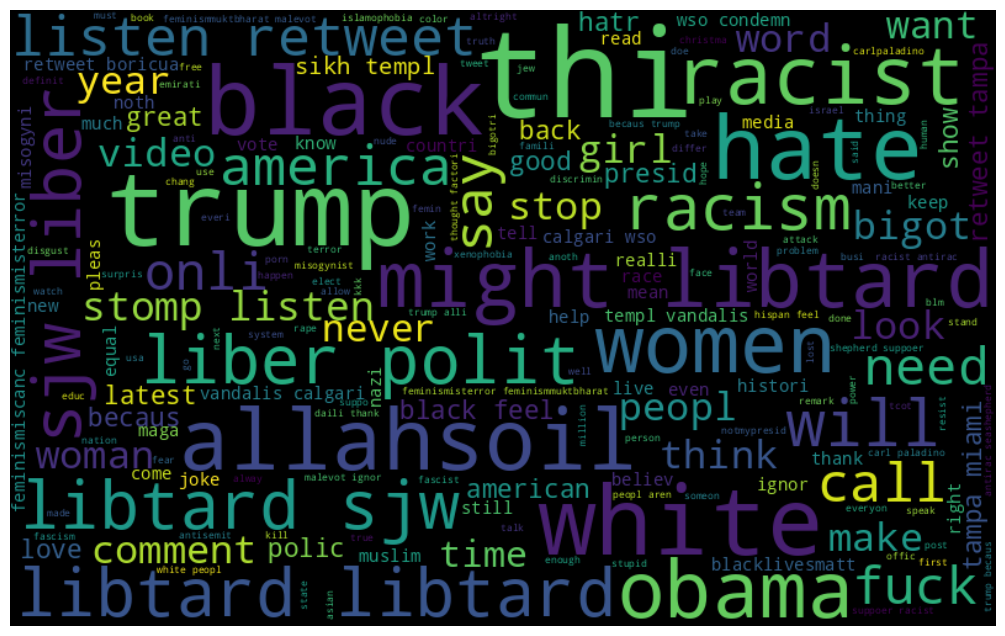

In [107]:
all_words= " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### Extract the hashtag

In [108]:
def hashtag_extract(tweets):
  hashtags =[]
  for tweet in tweets:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags

### Extract hashtag from non racist/sexist tweets

In [109]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])


###  Extract hashtag from racist/sexist tweets


In [110]:
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])


In [111]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [112]:
#unnest list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])
ht_positive[:5]


['run', 'lyft', 'disapoint', 'getthank', 'model']

In [113]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


### Select top 10 hashtags

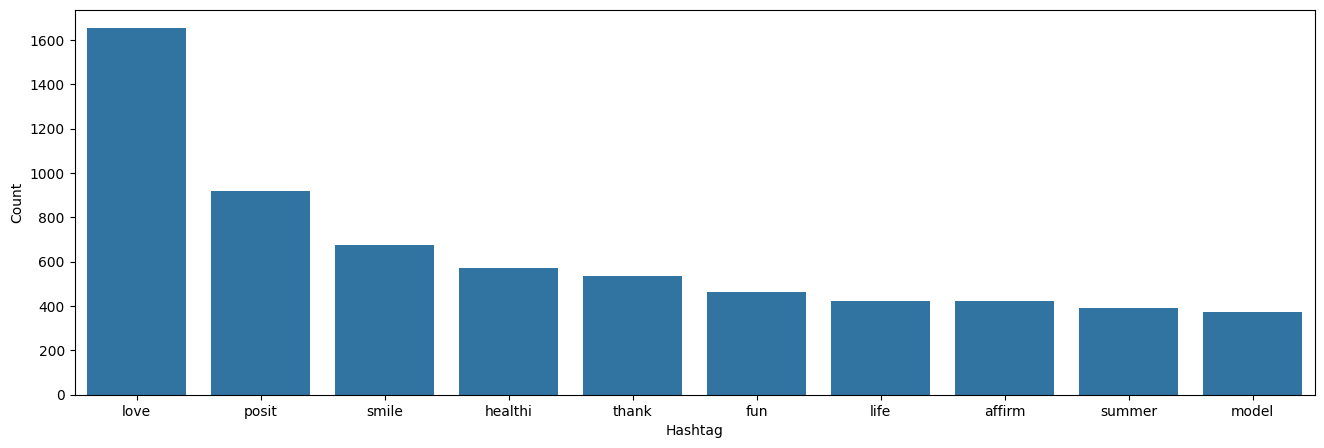

In [114]:
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtag",y="Count")
plt.show()

In [115]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


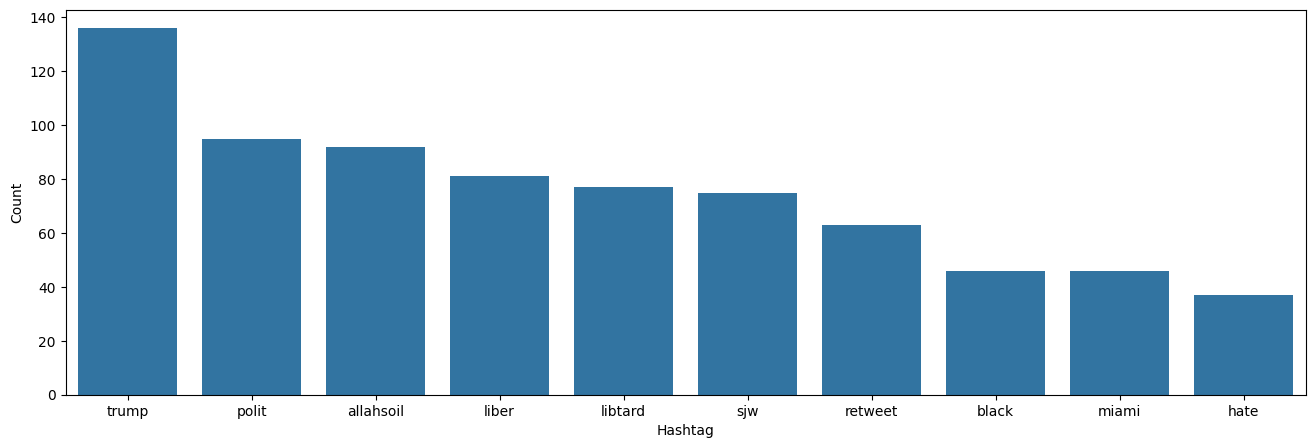

In [116]:
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="Hashtag",y="Count")
plt.show()

## Input Split

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])


In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## **Model Training**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [120]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [121]:
pred=model.predict(x_test)
f1=f1_score(y_test,pred)
acc_score=accuracy_score(y_test,pred)
print("F1 Score is:",f1)
print("Accuracy Score is:",acc_score)

F1 Score is: 0.4970414201183432
Accuracy Score is: 0.9468151670629458


In [126]:
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1] >= 0.3
pred=pred.astype(int)

f1=f1_score(y_test,pred)
acc_score=accuracy_score(y_test,pred)
print("F1 Score is:",f1)
print("Accuracy Score is:",acc_score)

F1 Score is: 0.5540275049115914
Accuracy Score is: 0.943186084344888
